In [1]:
# importing file module
from google.colab import files

In [2]:
# uploading files
uploaded = files.upload()

Saving Healthcare_dataset.xlsx to Healthcare_dataset.xlsx


Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading dataset

In [7]:
df = pd.read_excel('Healthcare_dataset.xlsx')
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [8]:
# dataframe shape
print(df.shape)
# checking for duplicates
print(df.Ptid.unique().shape)

(3424, 69)
(3424,)


In [19]:
#creating categorical column list
cat_cols = list(df.select_dtypes(['object']).columns)
print(len(cat_cols))

67


In [20]:
#creating column of numerical columns
num_cols = list(df.select_dtypes(['int64']).columns)
print(len(num_cols))
num_cols

2


['Dexa_Freq_During_Rx', 'Count_Of_Risks']

Checking for missing values

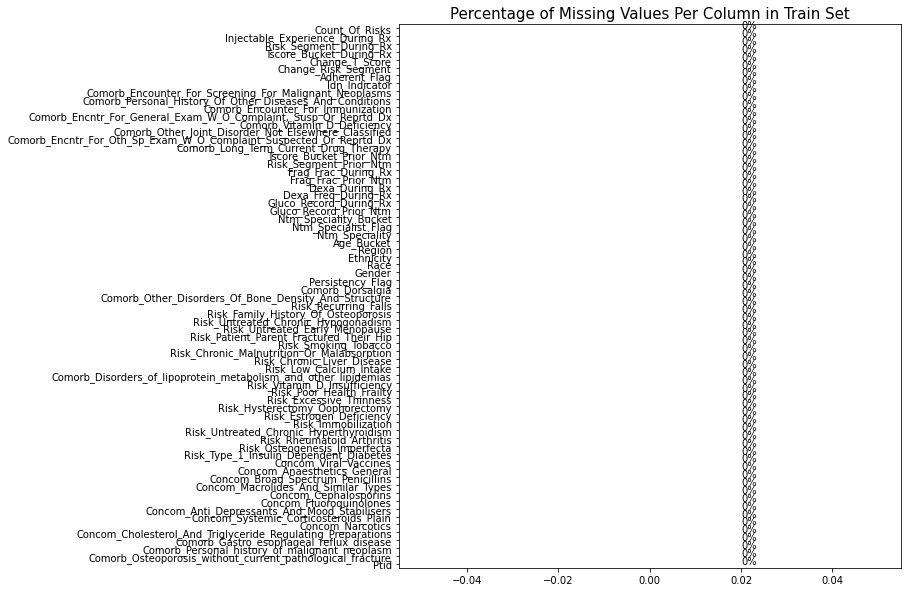

In [10]:
ax = df.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

**Outlier Identification and Treatment**

1. Identifying and treating using Boolean method

In [75]:
#making copy of dataset
df2=df.copy()

For column Dexa_Freq_During_Rx

In [76]:
#for Dexa frequency during RX, find IQR
Q1 = df2['Dexa_Freq_During_Rx'].quantile(0.25)
Q3 = df2['Dexa_Freq_During_Rx'].quantile(0.75)
IQR=Q3-Q1
IQR

3.0

In [77]:
#create a Boolean mask that sums up the number of possible outliers in column using the IQR above.
mask_high = (df2['Dexa_Freq_During_Rx'] > (Q3 + 1.5 * IQR))
mask_high

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Dexa_Freq_During_Rx, Length: 3424, dtype: bool

In [78]:
mask_high.sum() #number of outliers for dexa_freq_during_rx

460

In [79]:
#find and change the values of the high outliers,this is call capping 
df2.Dexa_Freq_During_Rx[mask_high]

32      20
33      13
62      12
65      20
89      10
        ..
3384    12
3396    10
3400    12
3411     8
3414     8
Name: Dexa_Freq_During_Rx, Length: 460, dtype: int64

For column Count_Of_Risks

In [80]:
#for Count_Of_Risks, find IQR
Q1 = df2['Count_Of_Risks'].quantile(0.25)
Q3 = df2['Count_Of_Risks'].quantile(0.75)
IQR=Q3-Q1
IQR

2.0

In [83]:
#create a Boolean mask that sums up the number of possible outliers in column using the IQR above.
mask_high = (df2['Count_Of_Risks'] > (Q3 + 1.5 * IQR))
mask_high

0       False
1       False
2       False
3       False
4       False
        ...  
3419    False
3420    False
3421    False
3422    False
3423    False
Name: Count_Of_Risks, Length: 3424, dtype: bool

In [84]:
mask_high.sum() #number of outliers for count_of_risks

8

In [85]:
##find and change the values of the high outliers,this is call capping 
df2.Count_Of_Risks[mask_high]

342     6
817     7
1059    7
2601    6
2860    6
3045    6
3146    6
3340    6
Name: Count_Of_Risks, dtype: int64

2. Identifying outliers using  boxplots

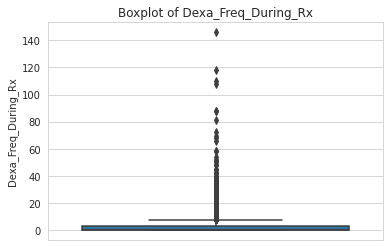

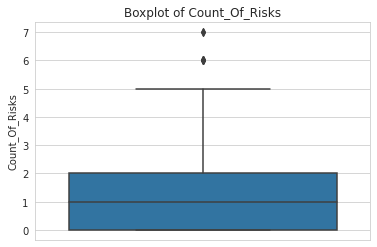

In [86]:
# creating a box plot of numerical columns to identify outliers
def boxplot(df, cols):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(y=col, data=df)
        plt.title('Boxplot of ' + col)
        plt.ylabel(col) #setting text for y axis
        plt.show()
boxplot(df, num_cols)

3. Identifying and treating outliers using Z-score

For column Dexa_Freq_During_Rx

In [23]:
df1=df.copy() #getting a copy of dataset

In [24]:
#finding the boundary values for Dexa_freq_during_rx
high=df1['Dexa_Freq_During_Rx'].mean() + 3*df1['Dexa_Freq_During_Rx'].std()
low=df1['Dexa_Freq_During_Rx'].mean() - 3*df1['Dexa_Freq_During_Rx'].std()

In [25]:
print("Highest allowed",high)
print("Lowest allowed",low)

Highest allowed 27.425698069039147
Lowest allowed -21.393571900814845


In [26]:
#finding outliers
newdf=df1[(df1['Dexa_Freq_During_Rx'] > high) | (df1['Dexa_Freq_During_Rx'] < low)]
newdf.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
198,P199,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,Y,28,Y,N,Y,VLR_LR,>-2.5,HR_VHR,<=-2.5,Worsened,Worsened,Adherent,Y,Y,N,Y,Y,N,Y,N,Y,Y,Y,N,Y,N,N,Y,N,Y,Y,N,Y,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,Y,N,N,N,N,N,N,3
241,P242,Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,37,Y,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,N,Y,Y,N,Y,N,N,N,Y,Y,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,1
541,P542,Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,81,Y,Y,N,VLR_LR,>-2.5,HR_VHR,<=-2.5,Worsened,Unknown,Adherent,Y,Y,Y,Y,Y,N,N,Y,N,N,N,N,Y,N,Y,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
651,P652,Persistent,Female,Caucasian,Not Hispanic,Midwest,65-75,PEDIATRICS,Others,OB/GYN/Others/PCP/Unknown,Y,Y,42,Y,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,Y,Y,Y,Y,N,Y,N,N,N,N,N,N,Y,N,N,N,Y,N,Y,N,N,Y,Y,Y,N,Y,N,N,N,N,N,N,N,Y,Y,N,N,N,Y,N,N,N,N,N,N,3
1265,P1266,Persistent,Female,Caucasian,Not Hispanic,West,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,N,28,Y,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,Improved,No change,Adherent,Y,Y,Y,Y,Y,Y,N,N,Y,N,N,N,N,N,Y,Y,Y,Y,N,Y,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,1


In [27]:
#treating outliers
#Applying the capping on outliers
df1['Dexa_Freq_During_Rx'] = np.where(
    df1['Dexa_Freq_During_Rx']> high,
    high,
    np.where(
        df1['Dexa_Freq_During_Rx']<low,
        low,
        df1['Dexa_Freq_During_Rx']
    )
)

In [28]:
#checking outliers after capping
newdf=df1[(df1['Dexa_Freq_During_Rx'] > high) | (df1['Dexa_Freq_During_Rx'] < low)]
newdf.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks


For column Count_Of_Risk

In [29]:
df1=df.copy() #getting a copy of dataset

In [30]:
#finding the boundary values 
high=df1['Count_Of_Risks'].mean() + 3*df1['Count_Of_Risks'].std()
low=df1['Count_Of_Risks'].mean() - 3*df1['Count_Of_Risks'].std()

In [31]:
print("Highest allowed",high)
print("Lowest allowed",low)

Highest allowed 4.52422941524692
Lowest allowed -2.0452574526300977


In [32]:
#finding outliers
newdf=df1[(df1['Count_Of_Risks'] > high) | (df1['Count_Of_Risks'] < low)]
newdf.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
302,P303,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,Y,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,>-2.5,No change,Unknown,Adherent,Y,Y,Y,Y,Y,Y,Y,N,Y,N,Y,N,Y,N,N,N,Y,Y,N,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,Y,Y,Y,N,Y,N,Y,N,N,N,N,N,N,5
342,P343,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,Y,0,N,Y,N,HR_VHR,<=-2.5,HR_VHR,>-2.5,No change,No change,Adherent,Y,Y,Y,Y,N,Y,Y,N,N,N,N,N,Y,N,N,N,Y,N,Y,N,Y,N,Y,N,N,N,N,N,N,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,6
352,P353,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,>-2.5,No change,Unknown,Adherent,Y,Y,Y,Y,Y,Y,N,N,N,N,N,Y,Y,Y,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,Y,N,Y,Y,N,N,N,N,N,5
495,P496,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,Y,Y,12,Y,N,N,VLR_LR,>-2.5,VLR_LR,>-2.5,No change,Unknown,Adherent,Y,Y,Y,Y,N,Y,Y,N,Y,N,Y,N,Y,N,N,Y,N,N,Y,Y,Y,N,N,Y,Y,N,N,N,N,N,Y,N,Y,N,Y,N,Y,N,Y,N,N,N,N,N,N,5
557,P558,Persistent,Female,Caucasian,Not Hispanic,South,65-75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,Y,N,5,Y,N,N,VLR_LR,>-2.5,VLR_LR,>-2.5,No change,No change,Adherent,Y,Y,Y,Y,Y,Y,Y,N,Y,Y,Y,Y,Y,Y,Y,N,Y,Y,N,N,Y,N,Y,N,N,N,Y,N,N,N,N,N,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,5


In [33]:
#treating outliers
#Applying the capping on outliers
df1['Count_Of_Risks'] = np.where(
    df1['Count_Of_Risks']> high,
    high,
    np.where(
        df1['Count_Of_Risks']<low,
        low,
        df1['Count_Of_Risks']
    )
)

In [34]:
#checking outliers after capping
newdf=df1[(df1['Count_Of_Risks'] > high) | (df1['Count_Of_Risks'] < low)]
newdf.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks


**Identification of Skewed Data and Treatment**

**Identification**

1. Using histograms

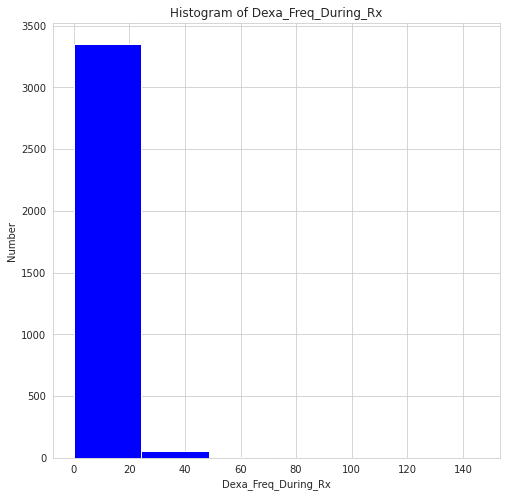

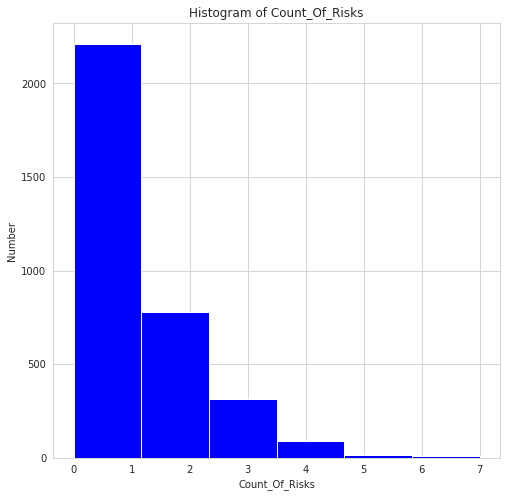

In [48]:
# ploting histogram for numerical columns
def plot_histogram(df, cols, bins=6):
    for col in cols:
        fig = plt.figure(figsize=(8,8))
        ax= fig.gca()
        df[col].plot.hist(ax = ax, bins = bins, color = 'blue')
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number')
        plt.show()
plot_histogram(df, num_cols)

2. Getting skewness and kurtosis measurement

In [49]:
def measure_skew_kurtosis(cols):
    for col in cols:
        print(col)
        result = df[[col]].agg(['skew', 'kurtosis']).transpose()
        print(result)
measure_skew_kurtosis(num_cols)

Dexa_Freq_During_Rx
                        skew   kurtosis
Dexa_Freq_During_Rx  6.80873  74.758378
Count_Of_Risks
                    skew  kurtosis
Count_Of_Risks  0.879791  0.900486


3. Using boxplots

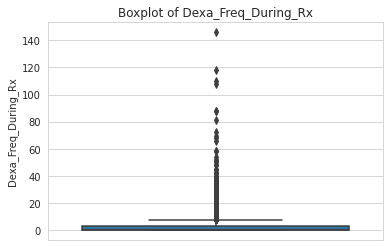

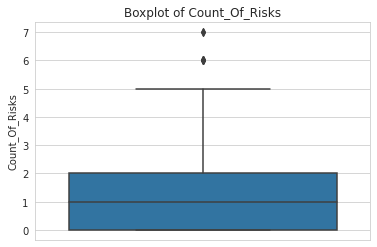

In [50]:
boxplot(df, num_cols)

**Treatment**

1. Log Transformation

In [40]:
df2 = df.copy()

In [41]:
df2[['log_Dexa','log_Count_Risks']] = np.log1p(df2[['Dexa_Freq_During_Rx','Count_Of_Risks']])

In [42]:
df2[['log_Dexa','log_Count_Risks']]

,log_Dexa,log_Count_Risks
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,1.098612
3,0.000000,0.693147
4,0.000000,0.693147
...,...,...
3419,0.000000,0.693147
3420,0.000000,0.000000
3421,2.079442,0.693147
3422,0.000000,0.000000


In [44]:
#Checking skew after transformation
df2.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Dexa_Freq_During_Rx,6.808730,74.758378
Count_Of_Risks,0.879791,0.900486
log_Dexa,1.405860,0.624570
log_Count_Risks,-0.091583,-1.006414


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f192a23b510>,
      dtype=object)

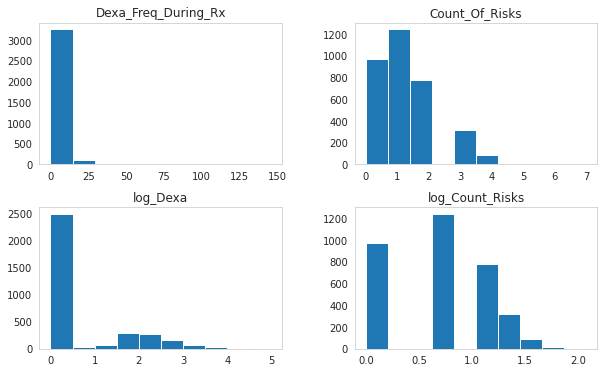

In [45]:
df2.hist(grid=False,
       figsize=(10, 6),
       bins=10)

2. Recipricol Transformation

In [35]:
df3 = df.copy()

In [36]:
df3[['reci_Dexa','reci_Count_Risks']] = np.reciprocal(df3[['Dexa_Freq_During_Rx','Count_Of_Risks']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in reciprocal
  """Entry point for launching an IPython kernel.


In [37]:
df3[['reci_Dexa','reci_Count_Risks']]

,reci_Dexa,reci_Count_Risks
0,-9223372036854775808,-9223372036854775808
1,-9223372036854775808,-9223372036854775808
2,-9223372036854775808,0
3,-9223372036854775808,1
4,-9223372036854775808,1
...,...,...
3419,-9223372036854775808,1
3420,-9223372036854775808,-9223372036854775808
3421,0,1
3422,-9223372036854775808,-9223372036854775808


In [38]:
#Checking skew after transformation
df3.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Dexa_Freq_During_Rx,6.808730,74.758378
Count_Of_Risks,0.879791,0.900486
reci_Dexa,1.017464,-0.965332
reci_Count_Risks,-0.962279,-1.074647


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f192a31ed90>,
      dtype=object)

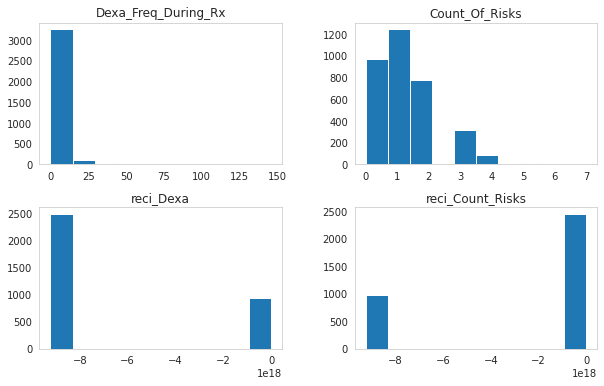

In [39]:
df3.hist(grid=False,
       figsize=(10, 6),
       bins=10)

3. Min-Max Transformation

min_max_Dexa_Freq_During_Rx
                                skew   kurtosis
min_max_Dexa_Freq_During_Rx  6.80873  74.758378


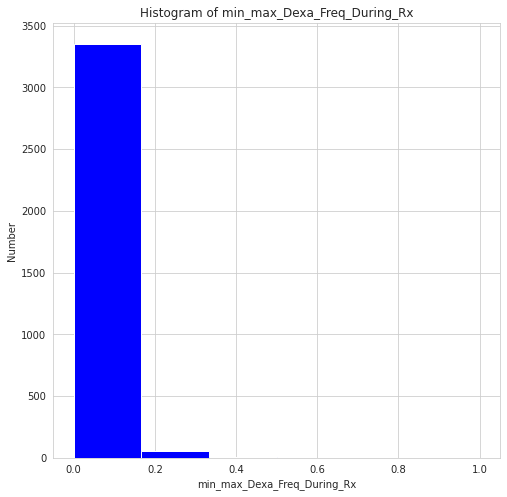

min_max_Count_Of_Risks
                            skew  kurtosis
min_max_Count_Of_Risks  0.879791  0.900486


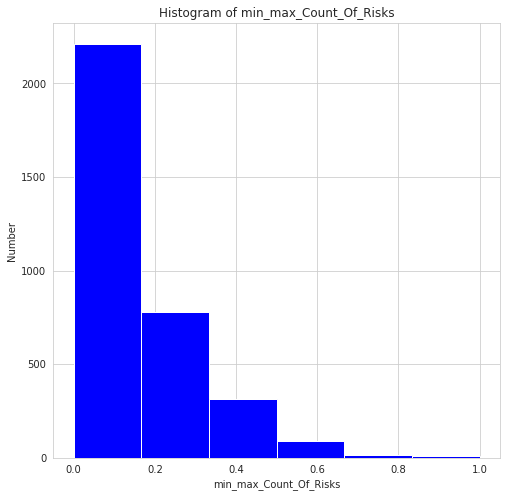

In [51]:
# min-max normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_min_max = df.copy() #getting a copy of dataframe
for col in num_cols:
    data = np.array(df_min_max[[col]])
    scaler.fit(data)#computing min and max to be used for scaling
    df['min_max_'+col] = scaler.transform(data) 
    measure_skew_kurtosis(['min_max_'+col]) #measure skewness and kurtosis
    plot_histogram(df, ['min_max_'+col]) # plot histogram

4. Square root Transformation

sqrt_Dexa_Freq_During_Rx
                              skew  kurtosis
sqrt_Dexa_Freq_During_Rx  1.992495  4.734647


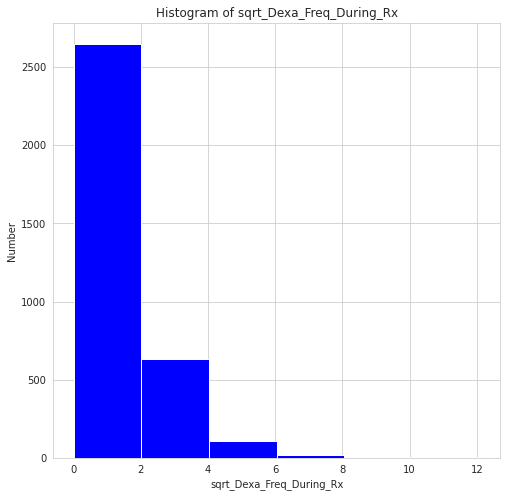

sqrt_Count_Of_Risks
                         skew  kurtosis
sqrt_Count_Of_Risks -0.327599 -1.038321


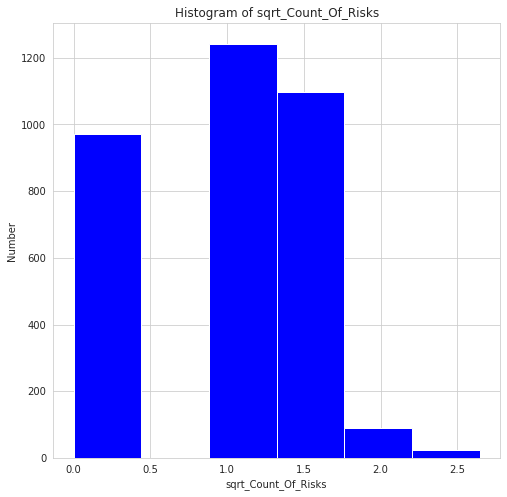

In [52]:
for col in num_cols:
    df['sqrt_'+col] = np.sqrt(df[col])
    measure_skew_kurtosis(['sqrt_'+col]) #measure skewness and kurtosis
    plot_histogram(df, ['sqrt_'+col]) # plot histogram

5 Trimming outliers

In [54]:
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [53]:
# function to find upper and lower boundaries
# for skewed distributed variables


def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

For column Dexa_Freq_During_Rx

In [56]:
df_trim = df.copy()

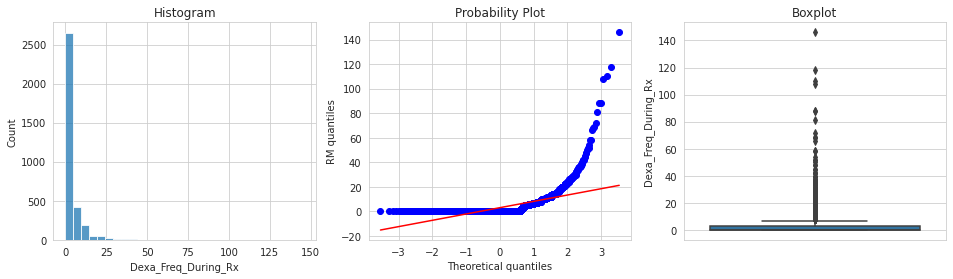

In [63]:
#plotting before transformation
diagnostic_plots(df_trim, 'Dexa_Freq_During_Rx')

In [57]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# dataset

upper_boundary, lower_boundary = find_skewed_boundaries(df_trim, 'Dexa_Freq_During_Rx', 1.5)
upper_boundary, lower_boundary

(7.5, -4.5)

In [58]:
# lets look at the number and percentage of outliers
# for LSTAT

print('total umber of patients: {}'.format(len(data)))

print('Patients with Dexa_Freq_During_Rx bigger than 32: {}'.format(
    len(df_trim[df_trim['Dexa_Freq_During_Rx'] > upper_boundary])))
print()
print('%Patients with Dexa_Freq_During_Rx bigger than 32: {}'.format(
    len(df_trim[df_trim['Dexa_Freq_During_Rx'] > upper_boundary])/len(df_trim)))

total umber of patients: 3424
Patients with Dexa_Freq_During_Rx bigger than 32: 460

%Patients with Dexa_Freq_During_Rx bigger than 32: 0.13434579439252337


In [59]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_skewed_boundaries(df_trim, 'Dexa_Freq_During_Rx', 1.5)
CRIM_upper_limit, CRIM_lower_limit

(7.5, -4.5)

In [60]:
# let's flag the outliers in the data set

outliers_CRIM = np.where(df_trim['Dexa_Freq_During_Rx'] > CRIM_upper_limit, True,
                       np.where(df_trim['Dexa_Freq_During_Rx'] < CRIM_lower_limit, True, False))

In [61]:
# let's trimm the dataset

data_trimmed = df_trim.loc[~(outliers_CRIM), ]

data.shape, data_trimmed.shape

((3424, 1), (2964, 73))

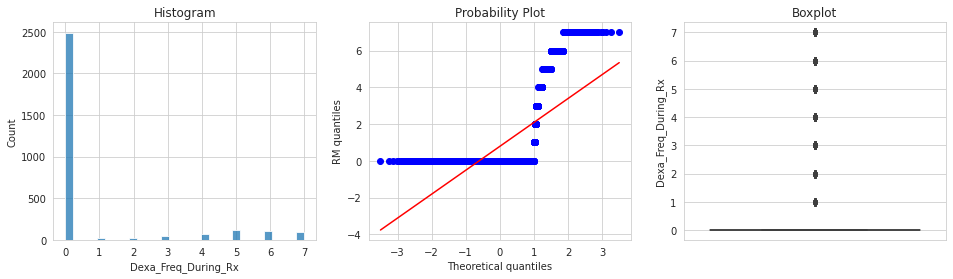

In [64]:
#plotting after transformation
diagnostic_plots(data_trimmed, 'Dexa_Freq_During_Rx')

For column count of risks

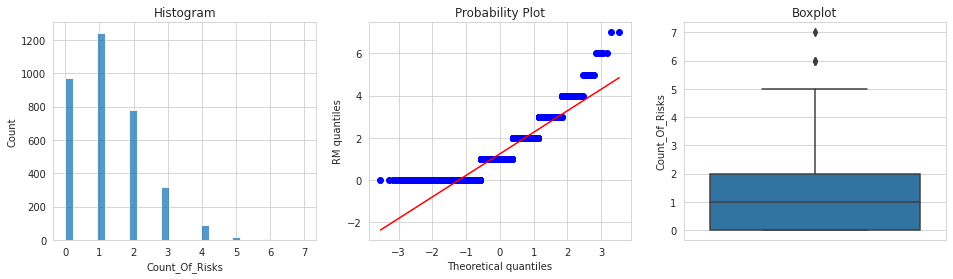

In [65]:
diagnostic_plots(df_trim, 'Count_Of_Risks')

In [66]:
# looking for outliers,
# using the interquantile proximity rule
# IQR * 1.5, the standard metric

# dataset

upper_boundary, lower_boundary = find_skewed_boundaries(df_trim, 'Count_Of_Risks', 1.5)
upper_boundary, lower_boundary

(5.0, -3.0)

In [67]:
# lets look at the number and percentage of outliers
# for LSTAT

print('total umber of patients: {}'.format(len(data)))

print('Patients with Count_Of_Risks bigger than 32: {}'.format(
    len(df_trim[df_trim['Count_Of_Risks'] > upper_boundary])))
print()
print('%Patients with Count_Of_Risks bigger than 32: {}'.format(
    len(df_trim[df_trim['Count_Of_Risks'] > upper_boundary])/len(df_trim)))

total umber of patients: 3424
Patients with Count_Of_Risks bigger than 32: 8

%Patients with Count_Of_Risks bigger than 32: 0.002336448598130841


In [68]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_skewed_boundaries(df_trim, 'Count_Of_Risks', 1.5)
CRIM_upper_limit, CRIM_lower_limit

(5.0, -3.0)

In [69]:
# let's flag the outliers in the data set

outliers_CRIM = np.where(df_trim['Count_Of_Risks'] > CRIM_upper_limit, True,
                       np.where(df_trim['Count_Of_Risks'] < CRIM_lower_limit, True, False))

In [70]:
# let's trimm the dataset

data_trimmed = df_trim.loc[~(outliers_CRIM), ]

data.shape, data_trimmed.shape

((3424, 1), (3416, 73))

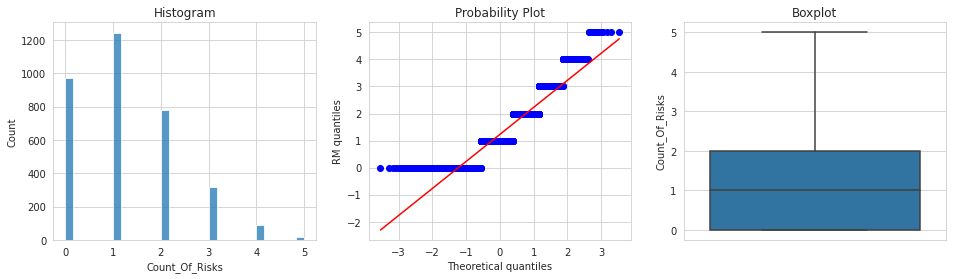

In [71]:
#plotting after transformation
diagnostic_plots(data_trimmed, 'Count_Of_Risks')

**Identifying and Treating Class Imbalance**

**Identifying**

In [72]:
print(df['Persistency_Flag'].value_counts())

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64


Persistency_Flag


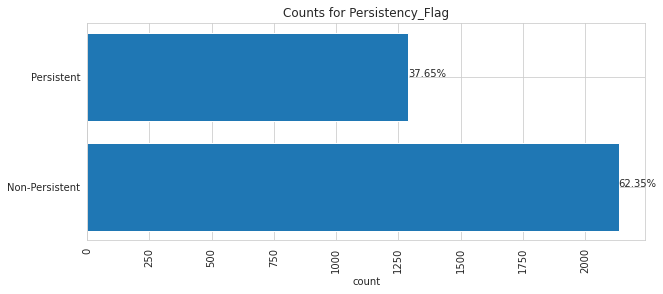

In [73]:
#bar graph for value counts for categorical columns
def plot_catcols(x, df):
    df['dummy'] = np.ones(shape = df.shape[0])
    for col in x:
        print(col)
        counts = df[['dummy', col]].groupby([col], as_index = False).count()
        fig, ax = plt.subplots(figsize = (10,4))
        graph = plt.barh(counts[col], counts.dummy) #creating a graph
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col)
        plt.xlabel('count')
        #getting percentages
        total = counts['dummy'].sum()
        percentage = []
        for i in range(counts.shape[0]):
            pct = (counts.dummy[i]/total)*100
            percentage.append(round(pct, 2))
        counts['Percentage'] = percentage
        # plotting the graph with percentages
        i = 0
        for p in graph:
            pct = f'{percentage[i]}%'
            width1, height1 =p.get_width(),p.get_height()
            x1 =p.get_x()+width1
            y1=p.get_y()+height1/2
            ax.annotate(pct,(x1,y1))
            i+=1
        plt.show()
plot_catcols(['Persistency_Flag'], df)

**Treating by Oversampling minority class**

Non-Persistent    2135
Persistent        2135
Name: Persistency_Flag, dtype: int64
Persistency_Flag


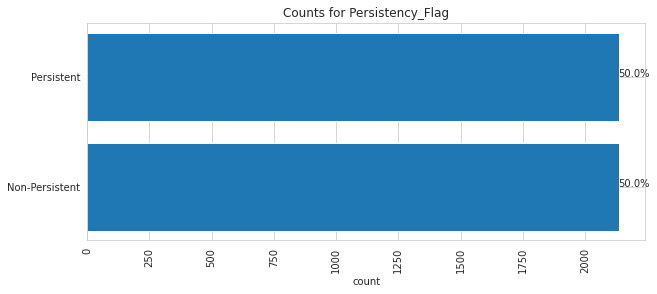

In [74]:
# dealing with class imbalance in the target variable
# oversampling the minority class i.e 'Persistent'

from sklearn.utils import resample

# separating minority and majority classes
non_persistent = df[df['Persistency_Flag']=='Non-Persistent']
persistent = df[df['Persistency_Flag']=='Persistent']

# oversampling minority
persistent_upsampled = resample(persistent,
                           replace=True, # sample with replacement
                           n_samples=len(non_persistent), # match number in majority class
                           random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled_df = pd.concat([non_persistent, persistent_upsampled])

# check new class counts
print(upsampled_df['Persistency_Flag'].value_counts())
# plotting graph of upsampled dataset
plot_catcols(['Persistency_Flag'], upsampled_df)